## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [1]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.cluster import KMeans, SpectralClustering
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
df = pd.read_csv('../data/wdbc.data', header=None)
display(df)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df.iloc[:, 1])
df.iloc[:, 1] = label_encoder.transform(df.iloc[:, 1])
display(df)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### (b) Monte-Carlo Simulation

In [4]:
def split_dataset(df):
    positive_class = df[df.iloc[:,1] == 1]
    negative_class = df[df.iloc[:,1] == 0]

    pos_train, pos_test = train_test_split(positive_class, test_size=0.20, shuffle=True)
    neg_train, neg_test = train_test_split(negative_class, test_size=0.20, shuffle=True)

    train_set = pd.concat([pos_train, neg_train]).sample(frac=1)
    test_set = pd.concat([pos_test, neg_test]).sample(frac=1)
    X_train, y_train = train_set.iloc[:, 2:], train_set.iloc[:, 1]
    X_test, y_test = test_set.iloc[:, 2:], test_set.iloc[:, 1]
    
    return X_train.to_numpy(), y_train.to_numpy().astype('int'), X_test.to_numpy(), y_test.to_numpy().astype('int')

#### (i) Supervised Learning

In [5]:
def l1SVC_best_paras(X, y):
    c_range = np.logspace(start=-3, stop=6, num=5, base=10)
    best_score = float('-inf')
    best_c = None
    for c in c_range:
        score = 0
        kf = KFold(n_splits=5)
        for train_index, test_index in kf.split(X):
            cur_X_train, cur_X_val = X[train_index], X[test_index]
            cur_y_train, cur_y_val = y[train_index], y[test_index]

            clf = OneVsRestClassifier(LinearSVC(penalty='l1', random_state=42, C=c, dual=False))
            clf.fit(cur_X_train, cur_y_train)
            score += clf.score(cur_X_val, cur_y_val)
        cur_score = score / 10
        if cur_score > best_score:
            best_score = cur_score
            best_c = c
    return best_score, best_c

def train_on_best_l1(cur_X, cur_y, cur_X_test, c):
    clf = OneVsRestClassifier(LinearSVC(penalty='l1', random_state=42, C=c, dual=False))
    clf.fit(cur_X, cur_y)
    return clf.predict(cur_X), clf.predict(cur_X_test)

def plot_cm_roc(y, prediects, output_type="None"):
    print("Output of", output_type)
    cm = confusion_matrix(y, prediects)
    cm_display = ConfusionMatrixDisplay(cm).plot()

    fpr, tpr, threshold = roc_curve(y, prediects)
    train_auc = auc(fpr, tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(fpr, tpr, marker='.', label='Train AUC = %0.3f)' % train_auc)
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

Output of Train


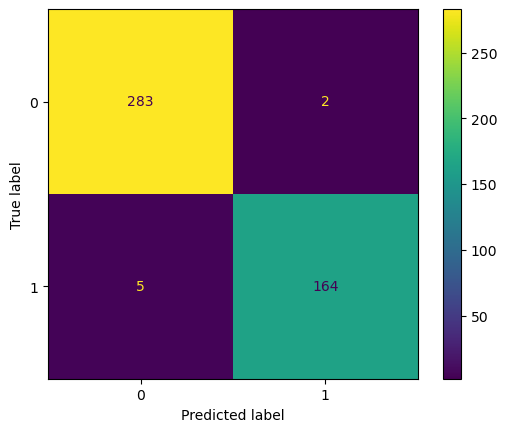

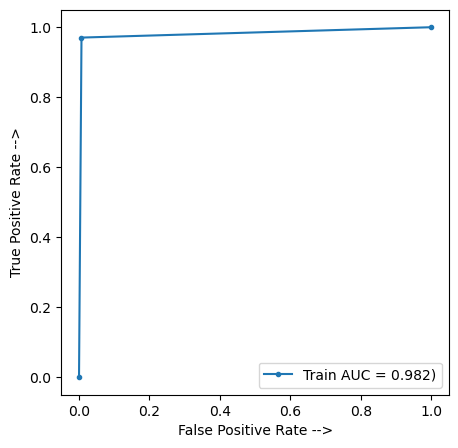

Output of Test


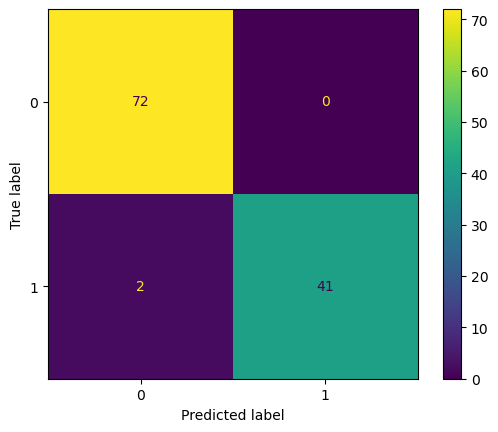

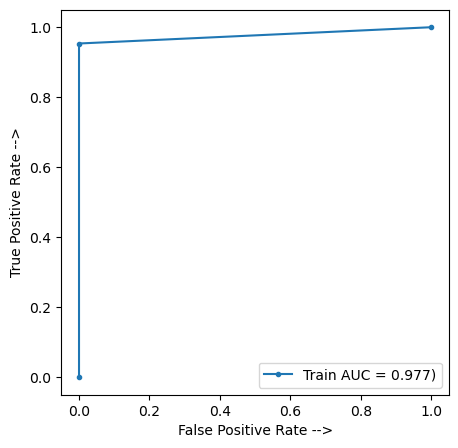

--Average Scores--
Train accuracy: 0.9863436123348021
Test accuracy: 0.976231884057971
Train precision: 0.9915779989925824
Test precision: 0.983502763229082
Train recall: 0.9715976331360943
Test recall: 0.9527131782945737
Train f1: 0.9814720532303735
Test f1: 0.9676007522865734
Train AUC: 0.9833426762171703
Test AUC: 0.9714954780361758


In [6]:
train_accs, train_precisions, train_recalls, train_f1s, train_aucs = [], [], [], [], []
test_accs, test_precisions, test_recalls, test_f1s, test_aucs = [], [], [], [], []

M = 30
for i in range(M):
    X_train, y_train, X_test, y_test = split_dataset(df)
    scaler = preprocessing.StandardScaler()
    scaler.fit(X_train)
    X_train_standardized = scaler.transform(X_train)
    scaler.fit(X_test)
    X_test_standardized = scaler.transform(X_test)

    best_score, best_c = l1SVC_best_paras(X_train_standardized, y_train)
    train_predicts, test_predicts = train_on_best_l1(X_train_standardized, y_train, X_test_standardized, best_c)

    train_accs.append(accuracy_score(y_train, train_predicts)) 
    test_accs.append(accuracy_score(y_test, test_predicts))
    train_precisions.append(precision_score(y_train, train_predicts))
    test_precisions.append(precision_score(y_test, test_predicts))
    train_recalls.append(recall_score(y_train, train_predicts))
    test_recalls.append(recall_score(y_test, test_predicts))
    train_f1s.append(f1_score(y_train, train_predicts))
    test_f1s.append(f1_score(y_test, test_predicts))
    train_aucs.append(roc_auc_score(y_train, train_predicts))
    test_aucs.append(roc_auc_score(y_test, test_predicts))
    if i == 0:
        plot_cm_roc(y_train, train_predicts, "Train")
        plot_cm_roc(y_test, test_predicts, "Test")

print("--Average Scores--")
print("Train accuracy:", sum(train_accs) / len(train_accs))
print("Test accuracy:", sum(test_accs) / len(test_accs))
print("Train precision:", sum(train_precisions) / len(train_precisions))
print("Test precision:", sum(test_precisions) / len(test_precisions))
print("Train recall:", sum(train_recalls) / len(train_recalls))
print("Test recall:", sum(test_recalls) / len(test_recalls))
print("Train f1:", sum(train_f1s) / len(train_f1s))
print("Test f1:", sum(test_f1s) / len(test_f1s))
print("Train AUC:", sum(train_aucs) / len(train_aucs))
print("Test AUC:", sum(test_aucs) / len(test_aucs))


#### (ii) Semi-Supervised Learning/ Self-training

In [7]:
def step_wise_training(labeled_X, labeled_y, unlabeled_X, c):
    clf = OneVsRestClassifier(LinearSVC(penalty='l1', random_state=42, C=c, dual=False))
    while unlabeled_X.shape[0] > 0:
        largest_dist = 0
        chosen_data = None
        del_index = -1
        clf.fit(labeled_X, labeled_y)
        for i, unlabeled_data in enumerate(unlabeled_X):
            dist = clf.decision_function(unlabeled_data.reshape(1, -1))
            if abs(dist) >= largest_dist:
                largest_dist = abs(dist)
                chosen_data = unlabeled_data
                del_index = i

        new_y = clf.predict(chosen_data.reshape(1, -1))
        unlabeled_X = np.delete(unlabeled_X, del_index, 0)
        labeled_X = np.append(labeled_X, unlabeled_data.reshape(1, -1), axis=0)
        labeled_y = np.append(labeled_y, new_y, axis=0)
    
    return labeled_X, labeled_y

Output of Train


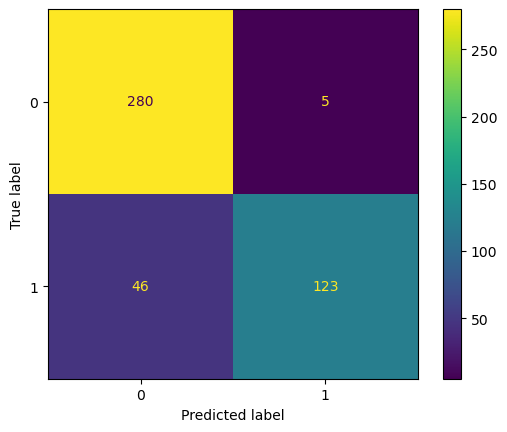

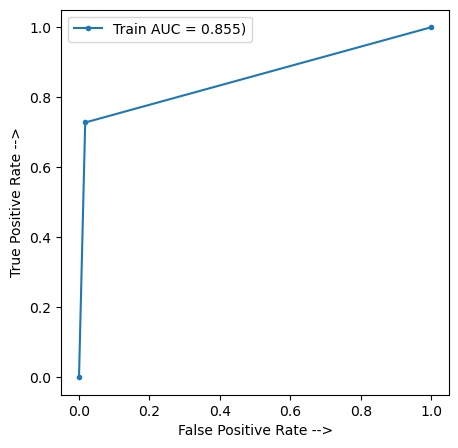

Output of Test


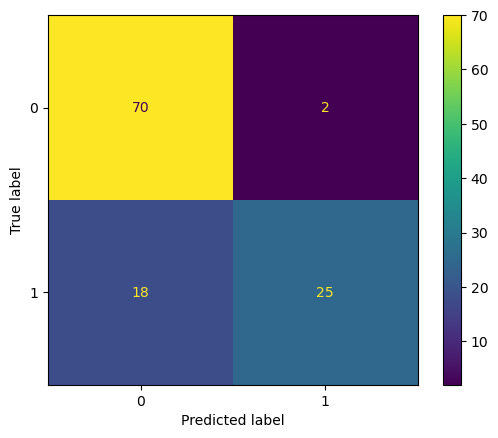

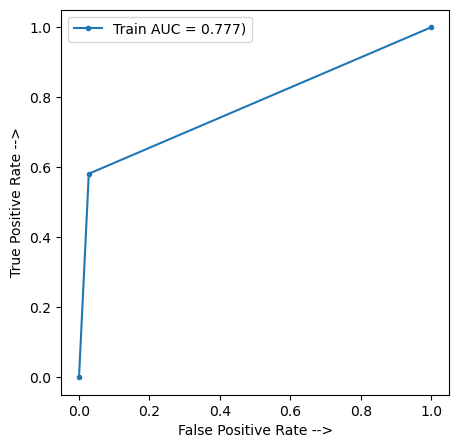

--Average Scores--
Train accuracy: 0.890308370044053
Test accuracy: 0.8788405797101448
Train precision: 0.9841537847113231
Test precision: 0.975748507626741
Train recall: 0.7169625246548326
Test recall: 0.693798449612403
Train f1: 0.8286159207924518
Test f1: 0.8083265958833931
Train AUC: 0.8550309699297555
Test AUC: 0.8415751507321275


In [8]:
train_accs, train_precisions, train_recalls, train_f1s, train_aucs = [], [], [], [], []
test_accs, test_precisions, test_recalls, test_f1s, test_aucs = [], [], [], [], []

M = 30
for i in range(M):
    X_train, y_train, X_test, y_test = split_dataset(df)
    scaler = preprocessing.StandardScaler()
    scaler.fit(X_train)
    X_train_standardized = scaler.transform(X_train)
    X_train_labeled, X_train_unlabeled = X_train_standardized[:len(X_train_standardized) // 2], X_train_standardized[len(X_train_standardized) // 2:]
    y_train_labeled = y_train[:len(X_train_standardized) // 2]
    scaler.fit(X_test)
    X_test_standardized = scaler.transform(X_test)

    # Part A
    best_score, best_c = l1SVC_best_paras(X_train_labeled, y_train_labeled)

    # Part B
    labeled_X, labeled_y = step_wise_training(X_train_labeled, y_train_labeled, X_train_unlabeled, best_c)
    train_predicts, test_predicts = train_on_best_l1(X_train_standardized, labeled_y, X_test_standardized, best_c)

    train_accs.append(accuracy_score(y_train, train_predicts)) 
    test_accs.append(accuracy_score(y_test, test_predicts))
    train_precisions.append(precision_score(y_train, train_predicts))
    test_precisions.append(precision_score(y_test, test_predicts))
    train_recalls.append(recall_score(y_train, train_predicts))
    test_recalls.append(recall_score(y_test, test_predicts))
    train_f1s.append(f1_score(y_train, train_predicts))
    test_f1s.append(f1_score(y_test, test_predicts))
    train_aucs.append(roc_auc_score(y_train, train_predicts))
    test_aucs.append(roc_auc_score(y_test, test_predicts))
    if i == 0:
        plot_cm_roc(y_train, train_predicts, "Train")
        plot_cm_roc(y_test, test_predicts, "Test")

print("--Average Scores--")
print("Train accuracy:", sum(train_accs) / len(train_accs))
print("Test accuracy:", sum(test_accs) / len(test_accs))
print("Train precision:", sum(train_precisions) / len(train_precisions))
print("Test precision:", sum(test_precisions) / len(test_precisions))
print("Train recall:", sum(train_recalls) / len(train_recalls))
print("Test recall:", sum(test_recalls) / len(test_recalls))
print("Train f1:", sum(train_f1s) / len(train_f1s))
print("Test f1:", sum(test_f1s) / len(test_f1s))
print("Train AUC:", sum(train_aucs) / len(train_aucs))
print("Test AUC:", sum(test_aucs) / len(test_aucs))

#### (iii) Unsupervised Learning

###  How do you make sure that the algorithm was not trapped in a local minimum? <br>
Ans: Run the algo using different init condition multiple times and find the clustering with lowest sum of WCV(Ck).

In [9]:
def find_majority(members):
    vote_count = collections.Counter(members)
    return vote_count.most_common(1)[0][0]

def runKmeans(X_train, X_test, y_train, k):
    train_predicts = []
    test_predicts = []
    # Part A
    kmeans = KMeans(init='random', n_clusters=k).fit(X_train)
    # Part B
    nearest_cluster_0_result = [label for _, label in sorted(zip(kmeans.transform(X_train)[:, 0], y_train))][:30]
    nearest_cluster_1_result = [label for _, label in sorted(zip(kmeans.transform(X_train)[:, 1], y_train))][:30]
    cluster_0_label = find_majority(nearest_cluster_0_result)
    cluster_1_label = find_majority(nearest_cluster_1_result)

    # Part C
    train_dists = kmeans.transform(X_train)
    test_dists = kmeans.transform(X_test)
    for i in range(len(train_dists)):
        if train_dists[i, 0] > train_dists[i, 1]:
            train_predicts.append(cluster_1_label)
        else:
            train_predicts.append(cluster_0_label)
    
    for i in range(len(test_dists)):
        if test_dists[i, 0] > test_dists[i, 1]:
            test_predicts.append(cluster_1_label)
        else:
            test_predicts.append(cluster_0_label)
    
    return train_predicts, test_predicts

c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Output of Train


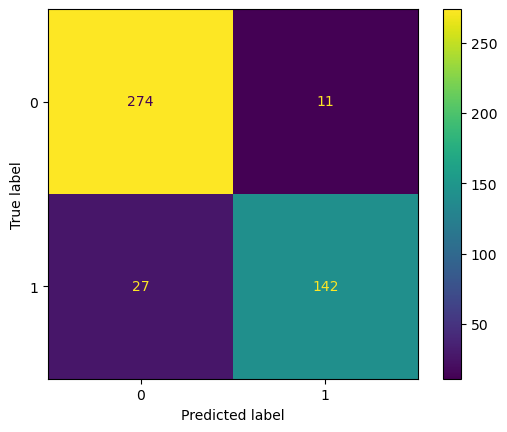

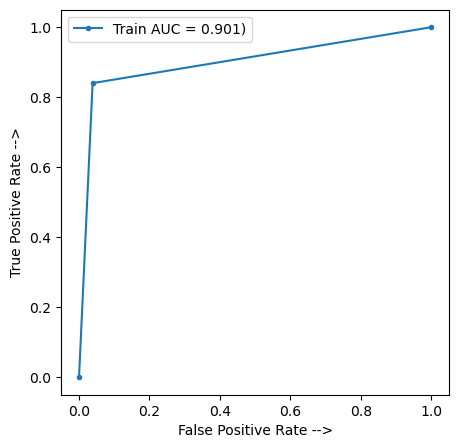

Output of Test


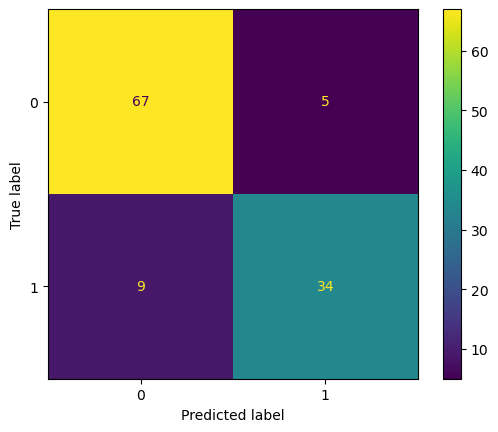

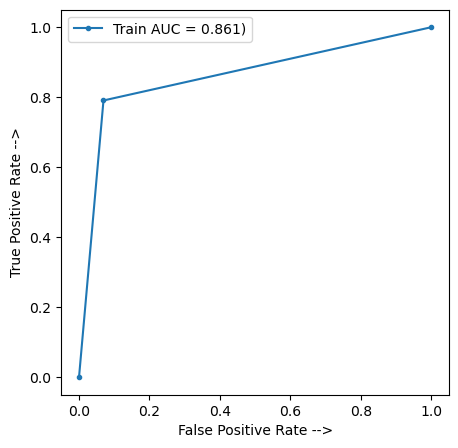

c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory 

--Average Scores--
Train accuracy: 0.9115271659324525
Test accuracy: 0.908985507246377
Train precision: 0.9230222167978706
Test precision: 0.9320631037736302
Train recall: 0.8323471400394477
Test recall: 0.8162790697674418
Train f1: 0.875021702294735
Test f1: 0.8697104678171104
Train AUC: 0.8954133361015951
Test AUC: 0.890315460809647


c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [10]:
train_accs, train_precisions, train_recalls, train_f1s, train_aucs = [], [], [], [], []
test_accs, test_precisions, test_recalls, test_f1s, test_aucs = [], [], [], [], []

M = 30
for i in range(M):
    X_train, y_train, X_test, y_test = split_dataset(df)
    scaler = preprocessing.StandardScaler()
    scaler.fit(X_train)
    X_train_standardized = scaler.transform(X_train)
    scaler.fit(X_test)
    X_test_standardized = scaler.transform(X_test)

    train_predicts, test_predicts = runKmeans(X_train_standardized, X_test_standardized, y_train, 2)

    train_accs.append(accuracy_score(y_train, train_predicts)) 
    test_accs.append(accuracy_score(y_test, test_predicts))
    train_precisions.append(precision_score(y_train, train_predicts))
    test_precisions.append(precision_score(y_test, test_predicts))
    train_recalls.append(recall_score(y_train, train_predicts))
    test_recalls.append(recall_score(y_test, test_predicts))
    train_f1s.append(f1_score(y_train, train_predicts))
    test_f1s.append(f1_score(y_test, test_predicts))
    train_aucs.append(roc_auc_score(y_train, train_predicts))
    test_aucs.append(roc_auc_score(y_test, test_predicts))
    if i == 0:
        plot_cm_roc(y_train, train_predicts, "Train")
        plot_cm_roc(y_test, test_predicts, "Test")

print("--Average Scores--")
print("Train accuracy:", sum(train_accs) / len(train_accs))
print("Test accuracy:", sum(test_accs) / len(test_accs))
print("Train precision:", sum(train_precisions) / len(train_precisions))
print("Test precision:", sum(test_precisions) / len(test_precisions))
print("Train recall:", sum(train_recalls) / len(train_recalls))
print("Test recall:", sum(test_recalls) / len(test_recalls))
print("Train f1:", sum(train_f1s) / len(train_f1s))
print("Test f1:", sum(test_f1s) / len(test_f1s))
print("Train AUC:", sum(train_aucs) / len(train_aucs))
print("Test AUC:", sum(test_aucs) / len(test_aucs))


#### (iv) Spectral Clustering

In [11]:
def runSpectralClustering(X_train, X_test, y_train, k):
    train_predicts = []
    test_predicts = []
    cluster_0_label = None
    cluster_1_label = None
    spectal_model = SpectralClustering(n_clusters=k, gamma=1, affinity='rbf').fit(X_train)

    # Define label
    cluster_0_predict_0 = 0
    cluster_0_predict_1 = 0
    cluster_1_predict_0 = 0
    cluster_1_predict_1 = 0 
    for i in range(len(spectal_model.labels_)):
        # Cluster 0
        if spectal_model.labels_[i] == 0:
            if y_train[i] == 0:
                cluster_0_predict_0 += 1
            else:
                cluster_0_predict_1 += 1
        else:
            if y_train[i] == 0:
                cluster_1_predict_0 += 1
            else:
                cluster_1_predict_1 += 1

    if cluster_0_predict_0 > cluster_0_predict_1:
        cluster_0_label = 0
    else:
        cluster_0_label = 1
    if cluster_1_predict_0 > cluster_1_predict_1:
        cluster_1_label = 0
    else:
        cluster_1_label = 1

    # Pedicts
    for i in range(len(spectal_model.labels_)):
        if spectal_model.labels_[i] == 0:
            train_predicts.append(cluster_0_label)
        else:
            train_predicts.append(cluster_1_label)
    
    test_result = spectal_model.fit_predict(X_test)
    for i in range(len(test_result)):
        if test_result[i] == 0:
            test_predicts.append(cluster_0_label)
        else:
            test_predicts.append(cluster_1_label)
    
    return train_predicts, test_predicts
    

c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Output of Train


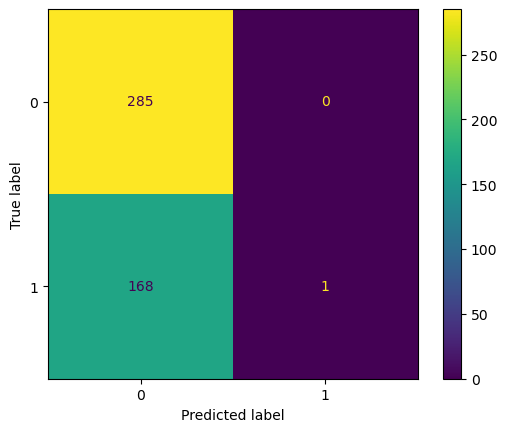

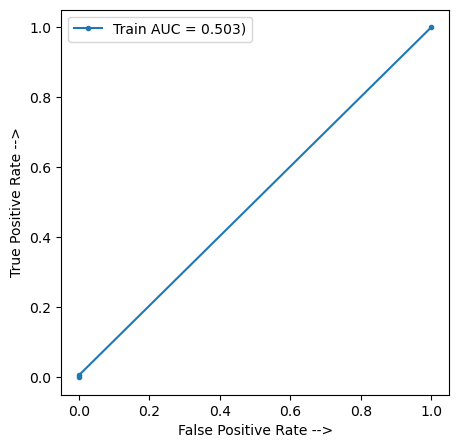

Output of Test


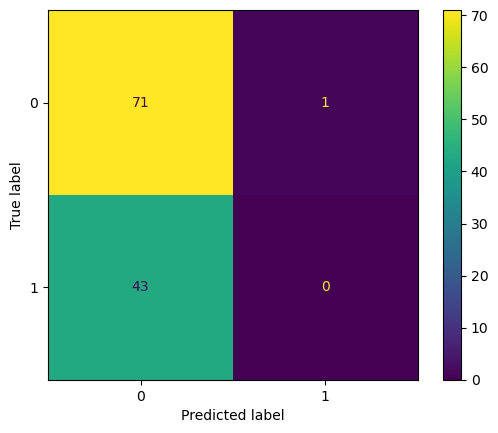

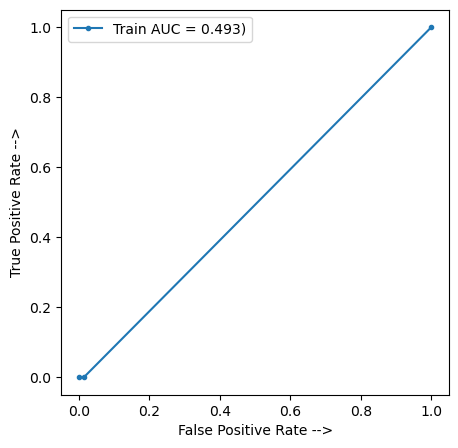

c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans 

--Average Scores--
Train accuracy: 0.6314977973568283
Test accuracy: 0.6330434782608696
Train precision: 1.0
Test precision: 0.6017904643614937
Train recall: 0.010059171597633136
Test recall: 0.1511627906976744
Train f1: 0.019903680770553833
Test f1: 0.14911182706303172
Train AUC: 0.5050295857988167
Test AUC: 0.5359980620155039


c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
train_accs, train_precisions, train_recalls, train_f1s, train_aucs = [], [], [], [], []
test_accs, test_precisions, test_recalls, test_f1s, test_aucs = [], [], [], [], []

M = 30
for i in range(M):
    X_train, y_train, X_test, y_test = split_dataset(df)
    scaler = preprocessing.StandardScaler()
    scaler.fit(X_train)
    X_train_standardized = scaler.transform(X_train)
    scaler.fit(X_test)
    X_test_standardized = scaler.transform(X_test)

    train_predicts, test_predicts = runSpectralClustering(X_train_standardized, X_test_standardized, y_train, 2)

    train_accs.append(accuracy_score(y_train, train_predicts)) 
    test_accs.append(accuracy_score(y_test, test_predicts))
    train_precisions.append(precision_score(y_train, train_predicts))
    test_precisions.append(precision_score(y_test, test_predicts))
    train_recalls.append(recall_score(y_train, train_predicts))
    test_recalls.append(recall_score(y_test, test_predicts))
    train_f1s.append(f1_score(y_train, train_predicts))
    test_f1s.append(f1_score(y_test, test_predicts))
    train_aucs.append(roc_auc_score(y_train, train_predicts))
    test_aucs.append(roc_auc_score(y_test, test_predicts))
    if i == 0:
        plot_cm_roc(y_train, train_predicts, "Train")
        plot_cm_roc(y_test, test_predicts, "Test")

print("--Average Scores--")
print("Train accuracy:", sum(train_accs) / len(train_accs))
print("Test accuracy:", sum(test_accs) / len(test_accs))
print("Train precision:", sum(train_precisions) / len(train_precisions))
print("Test precision:", sum(test_precisions) / len(test_precisions))
print("Train recall:", sum(train_recalls) / len(train_recalls))
print("Test recall:", sum(test_recalls) / len(test_recalls))
print("Train f1:", sum(train_f1s) / len(train_f1s))
print("Test f1:", sum(test_f1s) / len(test_f1s))
print("Train AUC:", sum(train_aucs) / len(train_aucs))
print("Test AUC:", sum(test_aucs) / len(test_aucs))


#### (iv) Compare

### Base on Test F1 result: <br>
Supervised(98%) > Unsupervised(87%) > Semi-Supervised(84%) > Spectrul(12%) <br>
Altough unsupervised method better than semi-supervised is not what I expect, there scores are very close. I believe I could choose better hyper parameter for semi-supervised method to make it outperform the other one. Additionally, another concern is we're using small dataset, there could be a different comparition result for some large dataset.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [13]:
df2 = pd.read_csv('../data/data_banknote_authentication.txt', header=None)
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]
display(X)
display(y)

,0,1,2,3
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: 4, Length: 1372, dtype: int64

### (b) Repeat each of the following two procedures 50 times

In [14]:
def test_eroor_on_best_l1(cur_X, cur_y, X_test, y_test, c):
    clf = OneVsRestClassifier(LinearSVC(penalty='l1', random_state=42, C=c, dual=False))
    clf.fit(cur_X, cur_y)
    return clf, 1 - clf.score(X_test, y_test)

#### (i) Passive

In [15]:
test_errors = [0 for _ in range(90)]
M = 50

for _ in range(M):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=472, shuffle=True)
    scaler = preprocessing.StandardScaler()
    X_train = preprocessing.normalize(scaler.fit_transform(X_train))
    scaler = preprocessing.StandardScaler()
    X_test = preprocessing.normalize(scaler.fit_transform(X_test))
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    iter_index = 0
    selected_index = 10
    while selected_index <= len(X_train):
        selected_X, selected_y = X_train[:selected_index], y_train[:selected_index]
        best_score, best_c = l1SVC_best_paras(selected_X, selected_y)
        clf, test_error = test_eroor_on_best_l1(selected_X, selected_y, X_test, y_test, best_c)
        test_errors[iter_index] += test_error
        selected_index += 10
        iter_index += 1

avg_errors = [e / M for e in test_errors]
print("Average error for 90 SVMs:")
print(avg_errors)


c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages

Average error for 90 SVMs:
[0.18593220338983055, 0.0878813559322034, 0.06538135593220343, 0.06059322033898306, 0.05656779661016948, 0.04779661016949154, 0.04398305084745764, 0.044152542372881375, 0.042754237288135606, 0.038898305084745774, 0.038644067796610185, 0.038093220338983054, 0.03576271186440678, 0.0353813559322034, 0.0353813559322034, 0.03449152542372882, 0.035127118644067805, 0.03694915254237288, 0.03449152542372884, 0.03504237288135595, 0.03347457627118647, 0.03364406779661018, 0.03216101694915255, 0.03228813559322034, 0.03139830508474578, 0.031694915254237316, 0.031483050847457644, 0.031567796610169514, 0.031144067796610192, 0.030550847457627133, 0.03067796610169493, 0.03025423728813562, 0.0303813559322034, 0.030169491525423746, 0.030254237288135616, 0.0307627118644068, 0.029872881355932225, 0.02932203389830511, 0.02936440677966103, 0.029957627118644085, 0.03004237288135595, 0.029067796610169533, 0.02949152542372884, 0.02894067796610173, 0.029110169491525454, 0.0289406779661

#### (ii) Active

In [16]:
active_test_errors = [0 for _ in range(90)]
M = 50

for _ in range(M):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=472, shuffle=True)
    scaler = preprocessing.StandardScaler()
    X_train = preprocessing.normalize(scaler.fit_transform(X_train))
    scaler = preprocessing.StandardScaler()
    X_test = preprocessing.normalize(scaler.fit_transform(X_test))
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()

    selected_X, selected_y = X_train[:10], y_train[:10]
    X_train, y_train = X_train[10:], y_train[10:]
    for iter_index in range(90):
        best_score, best_c = l1SVC_best_paras(selected_X, selected_y)
        clf, test_error = test_eroor_on_best_l1(selected_X, selected_y, X_test, y_test, best_c)
        active_test_errors[iter_index] += test_error
        if iter_index != 89:
            sorted_X_train  = np.array([x for dist, x, y in sorted(zip(abs(clf.decision_function(X_train)).tolist(),X_train.tolist(),y_train.tolist()))])
            y_train  = np.array([y for dist, x, y in sorted(zip(abs(clf.decision_function(X_train)).tolist(),X_train.tolist(),y_train.tolist()))])
            
            selected_X = np.concatenate((selected_X, sorted_X_train[:10]))
            selected_y = np.concatenate((selected_y, y_train[:10]))
            
            X_train = sorted_X_train[10:]
            y_train = y_train[10:]


active_avg_errors = [e / M for e in active_test_errors]
print("Average active learning error for 90 SVMs:")
print(active_avg_errors)

c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
c:\Users\chun\anaconda3\envs\DS552\lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(


Average active learning error for 90 SVMs:
[0.17406779661016952, 0.07957627118644069, 0.05483050847457629, 0.039872881355932206, 0.0409322033898305, 0.02855932203389831, 0.023305084745762712, 0.02889830508474576, 0.025127118644067803, 0.02313559322033899, 0.020720338983050857, 0.02161016949152544, 0.0203813559322034, 0.01974576271186441, 0.020042372881355942, 0.020677966101694933, 0.020254237288135597, 0.020550847457627114, 0.020762711864406792, 0.020974576271186443, 0.021016949152542378, 0.02169491525423729, 0.021864406779661026, 0.02190677966101696, 0.022118644067796622, 0.022330508474576294, 0.02228813559322036, 0.022288135593220345, 0.022754237288135606, 0.022669491525423736, 0.022923728813559335, 0.023220338983050856, 0.023305084745762726, 0.02326271186440679, 0.023305084745762716, 0.023389830508474586, 0.023559322033898312, 0.02360169491525424, 0.023855932203389836, 0.0244491525423729, 0.024576271186440693, 0.024533898305084758, 0.024491525423728823, 0.024533898305084758, 0.02457

### (c) Average the 50 test errors

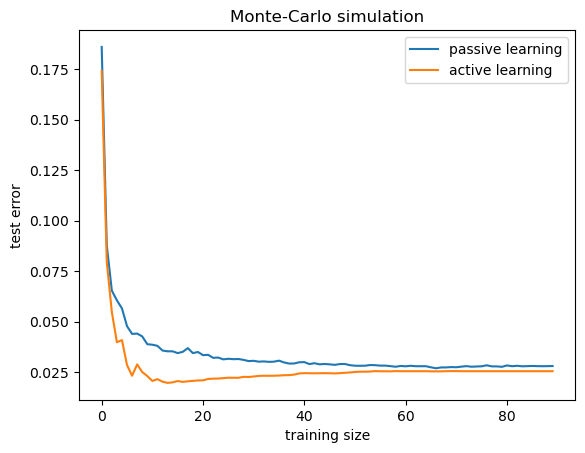

In [17]:
plt.plot(avg_errors)
plt.plot(active_avg_errors)
plt.title('Monte-Carlo simulation')
plt.ylabel('test error')
plt.xlabel('training size')
plt.legend(['passive learning', 'active learning'], loc='upper right')
plt.show()

### Conclusion: <br>
Active learning has a better result when training size is small, but they would finally converge.
